# Deeper Dives

## Reading snapshots

In [1]:
import pynbody
import numpy as np
f = pynbody.load("testdata/gadget2/test_g2_snap")

### Finding out something about the file

In [2]:
len(f)

8192

In [3]:
f.families()

[<Family gas>, <Family dm>, <Family star>]

In [4]:
len(f.dm)
len(f.gas)
len(f.star)

57

In [5]:
f.properties

{'omegaM0': 0.2669,
 'omegaL0': 0.7331,
 'boxsize': Unit("3.00e+03 kpc a h**-1"),
 'a': 0.2777777798158637,
 'h': 0.71,
 'time': Unit("3.55e+00 s kpc a**1/2 km**-1 h**-1")}

In [6]:
f.properties['a']

0.2777777798158637

### Retrieving data

In [ ]:
f.keys() # lazy loaded?

[]

In [8]:
f.loadable_keys()

['mass', 'pos', 'vel', 'iord']

In [9]:
f['pos']

SimArray([[  53.318974,  177.84364 ,  128.22311 ],
          [ 306.75046 ,  140.44455 ,  215.37149 ],
          [ 310.99908 ,   64.1345  ,  210.53595 ],
          ...,
          [2870.9016  , 2940.1711  , 1978.7949  ],
          [2872.4114  , 2939.2197  , 1983.916   ],
          [2863.6511  , 2938.0544  , 1980.0615  ]],
         shape=(8192, 3), dtype=float32, 'kpc a h**-1')

In [10]:
f.gas.loadable_keys()

['smooth',
 'nhp',
 'mass',
 'rho',
 'nhep',
 'pos',
 'vel',
 'nheq',
 'nh',
 'sfr',
 'nhe',
 'iord',
 'u']

In [11]:
f.gas['rho']

SimArray([1.3888609e-09, 3.3617684e-09, 4.5273674e-09, ..., 8.5340952e-09,
          7.4101774e-09, 1.4051752e-09], shape=(4039,), dtype=float32, '1.00e+10 h**2 Msol a**-3 kpc**-3')

### Creating your own arrays

In [12]:
f['twicethemass'] = f['mass']*2

In [13]:
f.gas['myarray'] = f.gas['rho']**2

In [ ]:
@pynbody.derived_array # NOTE: use for dynamic updates
def thricethemass(sim) :
    return sim['mass']*3

In [17]:
f['thricethemass']

SimArray([0.02464408, 0.02464408, 0.02464408, ..., 0.02464408, 0.02464408,
          0.02464408], shape=(8192,), dtype=float32, '1.00e+10 Msol h**-1')

In [18]:
f['mass'][0] = 1
f['thricethemass']

SimArray([3.        , 0.02464408, 0.02464408, ..., 0.02464408, 0.02464408,
          0.02464408], shape=(8192,), dtype=float32, '1.00e+10 Msol h**-1')

### Keeping on top of units

In [19]:
f['mass'].units

Unit("1.00e+10 Msol h**-1")

In [20]:
f['pos'].in_units('Mpc')

SimArray([[0.02086032, 0.06957889, 0.05016554],
          [0.12001192, 0.05494701, 0.08426115],
          [0.12167414, 0.02509174, 0.08236931],
          ...,
          [1.1232009 , 1.1503017 , 0.7741764 ],
          [1.1237916 , 1.1499294 , 0.77617997],
          [1.1203643 , 1.1494735 , 0.774672  ]],
         shape=(8192, 3), dtype=float32, 'Mpc')

In [21]:
f.physical_units()

In [22]:
f.gas['rho']

SimArray([ 326.6502 ,  790.66406, 1064.8047 , ..., 2007.1586 , 1742.821  ,
           330.4872 ], shape=(4039,), dtype=float32, 'Msol kpc**-3')

In [23]:
f['vel']

SimArray([[ 27.938293 ,   4.983705 , -10.008866 ],
          [ 15.361564 ,   5.7859726,   4.3631563],
          [ -8.357319 ,  -2.8885257,  22.809904 ],
          ...,
          [ 27.749176 ,  85.60175  ,  15.532437 ],
          [ 40.755856 ,  59.442867 ,  44.244846 ],
          [ 38.383965 ,  68.63973  ,  46.01429  ]],
         shape=(8192, 3), dtype=float32, 'km s**-1')

In [24]:
5*f['vel']
(f['vel']**2).units
np.sqrt(((f['vel']**2).sum(axis=1)*f['mass'])).units

Unit("km Msol**1/2 s**-1")

In [25]:
array = pynbody.array.SimArray(np.random.rand(10)) # make the newly-formed numpy array a pynbody array
array.sim = f # this links the array to the simulation
array.units = 'Mpc a' # we set units that require cosmology information
array
array.in_units('kpc')

SimArray([100.65554414, 177.08145483, 269.77397166,  15.64485909,
          131.21063549, 159.34457187,  11.09794131, 258.89946811,
          208.06248336,  42.10750442], 'kpc')

### Subsnaps

In [26]:
every_tenth = f[::10]
len(every_tenth)

820

In [27]:
every_tenth['pos'][1]
every_tenth['pos'][1] = [1,2,3]
every_tenth['pos'][1]

SimArray([1., 2., 3.], dtype=float32, 'kpc')

In [ ]:
f['pos'][10] # like python lists, mutable views

SimArray([1., 2., 3.], dtype=float32, 'kpc')

In [29]:
f_slab = f[(f['x']>1000)&(f['x']<2000)]
f_slab['x'].min()
f_slab['x'].max()
f['x'].min()
f['x'].max()

SimArray(1173.6926, dtype=float32, 'kpc')

In [30]:
len(f_slab.dm)
len(f_slab.dm[::10])
f_slab[[100,105,252]].gas['pos']

SimArray([[1029.6443 ,  421.70737,  169.25818],
          [1097.2487 ,  377.8681 ,  149.81082],
          [1059.9261 ,  374.7446 ,  192.37201]], dtype=float32, 'kpc')

### Filters

In [31]:
from pynbody.filt import *
f_sphere = f[Sphere('10 kpc')]

### Centering

In [32]:
f = pynbody.load("testdata/gasoline_ahf/g15784.lr.01024.gz");
h = f.halos();
pynbody.analysis.center(h[0])

pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor


<Transformation translate, offset_velocity>

In [ ]:
h[1]['pos'][0]
h[5]['pos'][0]
h5 = h[5]
my_h5_transform = pynbody.analysis.center(h5, move_all=False)
h[1]['pos'][0] # should be unchanged
h5['pos'][0] # should be changed, useful for plots and profiles

SimArray([ 0.00124333, -0.00044998, -0.00101245], '6.85e+04 kpc a')

In [34]:
my_h5_transform.revert()
print(h5['pos'][0]) # back to where it started
print(h[1]['pos'][0]) # still hasn't changed, of course

[-0.01305085  0.00186122 -0.04388914]
[-0.02857659  0.03555186 -0.10901458]


In [35]:
with pynbody.analysis.center(h[5]):
    print("Position when inside with block: ", h[5]['pos'][0])
print("Position when outside with block: ", h[5]['pos'][0])

Position when inside with block:  [ 0.00124333 -0.00044998 -0.00101245]
Position when outside with block:  [-0.01305085  0.00186122 -0.04388914]


## Subviews and Filters

### Creating a simple subview

In [36]:
import pynbody
import numpy as np
f = pynbody.load("testdata/gasoline_ahf/g15784.lr.01024")
f.physical_units()

In [37]:
subsnap_slice = f[100:200:2]
subsnap_indexed = f[[0, 90, 200, 1000]]

In [38]:
np.all(f['pos'][100] == subsnap_slice['pos'][0])
np.all(f['pos'][[0, 90, 200, 1000]] == subsnap_indexed['pos'])

np.True_

In [39]:
h = f.halos()
subsnap_halo0 = h[0]
(subsnap_halo0['mass'][:,np.newaxis]*subsnap_halo0['pos']).sum(axis=0)/subsnap_halo0['mass'].sum()

pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor


SimArray([ 1675.70819996, -2333.17011991, -8387.15939682], 'kpc')

In [40]:
subsnap_halo0.mean_by_mass('pos')

SimArray([ 1675.70819996, -2333.17011991, -8387.15939682], 'kpc')

### The relationship is two-way

In [41]:
subsnap_slice['pos'][0] = [1., 2., 3.]
f['pos'][100]

SimArray([1., 2., 3.], 'kpc')

In [ ]:
f['pos'][100] = [4., 5., 6.]
subsnap_slice['pos'][0] # dynamically updated

SimArray([4., 5., 6.], 'kpc')

### Filters

In [43]:
cen = subsnap_halo0.mean_by_mass('pos')
sphere_filter = pynbody.filt.Sphere('200 kpc', cen)
sphere_view = f[sphere_filter]
f"DM, gas, star mass: {sphere_view.dm['mass'].sum():.1e}, \
{sphere_view.g['mass'].sum():.1e}, and {sphere_view.s['mass'].sum():.1e} Msol."

'DM, gas, star mass: 1.2e+12, 8.3e+10, and 1.1e+11 Msol.'

In [44]:
sphere_filter_outer = pynbody.filt.Sphere('200 kpc', cen) \
                      & ~pynbody.filt.Sphere('25 kpc', cen)

sphere_outer_view = f[sphere_filter_outer]
f"DM, gas, star mass: \
{sphere_outer_view.dm['mass'].sum():.1e}, {sphere_outer_view.g['mass'].sum():.1e}, \
and {sphere_outer_view.s['mass'].sum():.1e} Msol."

'DM, gas, star mass: 9.2e+11, 7.4e+10, and 1.2e+10 Msol.'

In [45]:
age_filter = pynbody.filt.BandPass('age', '1 Gyr', '10 Gyr')
age_sphere_filter = age_filter & pynbody.filt.Sphere('25 kpc', cen)
age_sphere_view = f.star[age_sphere_filter]
f"Stellar mass in range: {age_sphere_view['mass'].sum():.1e} Msol."

'Stellar mass in range: 3.5e+10 Msol.'

## Halos and Groups

In [46]:
import pynbody
import matplotlib.pylab as plt

s = pynbody.load('testdata/gasoline_ahf/g15784.lr.01024.gz')
s.halos()

pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor


<AHFCatalogue, length 1411>

In [47]:
s = pynbody.load('testdata/gadget4_subfind_HBT/snapshot_034.hdf5')
s.halos()

/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/snapshot/gadgethdf.py:449: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


<Gadget4SubfindHDFCatalogue, length 2517>

### Selecting a format

In [48]:
s.halos(priority=['HBTPlusCatalogue'])

<HBTPlusCatalogue, length 2349>

### Specifying locations

In [49]:
s.halos(filename='testdata/gadget4_subfind_HBT/034/SubSnap_034.0.hdf5')
h = s.halos(filename='testdata/gadget4_subfind_HBT/fof_subhalo_tab_034.hdf5')
h

<Gadget4SubfindHDFCatalogue, length 2517>

### Information about the catalogue

In [50]:
len(h)

2517

In [51]:
len(h[0]), len(h[1])

(307386, 137037)

In [52]:
h[0]['mass'].sum().in_units('1e12 Msol')
h[0]['pos'][:5]

/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/snapshot/gadgethdf.py:469: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


SimArray([[23.750328, 27.66374 , 25.721956],
          [23.751205, 27.66415 , 25.72195 ],
          [23.75042 , 27.66385 , 25.722666],
          [23.75083 , 27.663345, 25.722668],
          [23.750278, 27.663668, 25.722883]], dtype=float32, '3.09e+24 cm a h**-1')

In [53]:
h[0].properties['GroupMass']

Unit("7.80e+44 g h**-1")

In [54]:
h.physical_units()
h[0].properties['GroupMass']

Unit("5.82e+11 Msol")

In [55]:
subhalos_of_0 = h[0].subhalos
subhalos_of_0

<SubhaloCatalogue, length 135>

In [56]:
len(subhalos_of_0[0]), subhalos_of_0[0].properties['SubhaloMass']

(215716, Unit("4.09e+11 Msol"))

### Accessing particle data

In [57]:
h[0]['mass']

SimArray([1.8945181e+06, 1.8945181e+06, 1.8945181e+06, ..., 1.8945181e+06,
          1.8945181e+06, 1.8945181e+06], shape=(307386,), dtype=float32, 'Msol')

In [58]:
h[0]['mass'].sum()
h[0].properties['GroupMass']

Unit("5.82e+11 Msol")

In [59]:
h[0]['pos'][:5]

SimArray([[16014.695, 18653.484, 17344.152],
          [16015.287, 18653.76 , 17344.148],
          [16014.757, 18653.559, 17344.63 ],
          [16015.033, 18653.219, 17344.63 ],
          [16014.662, 18653.436, 17344.777]], dtype=float32, 'kpc')

In [60]:
h[0].subhalos[0]['vel'][:5]

SimArray([[-76.89401 , 163.26326 ,  63.777664],
          [-83.55451 , 161.6504  ,  74.341225],
          [-87.5334  , 179.96936 ,  70.71324 ],
          [-94.90368 , 183.4485  ,  61.012352],
          [-69.53241 , 160.77155 ,  72.38382 ]], dtype=float32, 'km s**-1')

### Working with large numbers of halos

In [61]:
h.load_all()
h[0]['vel'].std() # for one
v_std = [halo_i['vel'].std() for halo_i in h[:100]] # for the first 100

In [62]:
h.get_properties_one_halo(0)['GroupMass'] # for one, without touching any particles
masses = h.get_properties_all_halos()['GroupMass'][:100] # for first 100, without touching any particles

[]

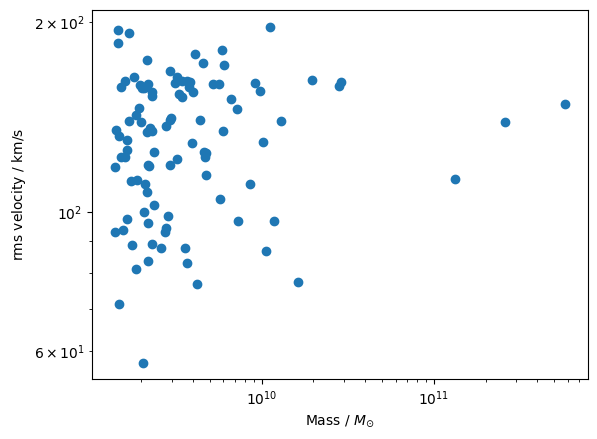

In [63]:
plt.plot(masses, v_std, 'o')
plt.xlabel(r'Mass / $M_{\odot}$')
plt.ylabel(r'rms velocity / $\mathrm{km/s}$')
plt.loglog()

## Halo Mass Functions

In [65]:
# !wget https://zenodo.org/records/10825178/files/tutorial_gadget.tar.gz?download=1 -O tutorial_gadget4.tar.gz
!tar -xvzf tutorial_gadget.tar

x tutorial_gadget/
x tutorial_gadget/snapshot_020
x tutorial_gadget/snapshot_019
x tutorial_gadget/hsmldir_019/
x tutorial_gadget/hsmldir_020/
x tutorial_gadget/groups_019/
x tutorial_gadget/groups_020/
x tutorial_gadget/groups_020/subhalo_tab_020.0
x tutorial_gadget/groups_020/subhalo_ids_020.0
x tutorial_gadget/groups_020/group_tab_020.0
x tutorial_gadget/groups_020/group_ids_020.0
x tutorial_gadget/groups_019/subhalo_ids_019.0
x tutorial_gadget/groups_019/subhalo_tab_019.0
x tutorial_gadget/groups_019/group_ids_019.0
x tutorial_gadget/groups_019/group_tab_019.0
x tutorial_gadget/hsmldir_020/hsml_020.0
x tutorial_gadget/hsmldir_019/hsml_019.0


### Calculating a theoretical halo mass function

In [66]:
import pynbody
import matplotlib.pyplot as p
s = pynbody.load('tutorial_gadget/snapshot_020')
s.physical_units()

In [67]:
s.properties['omegaM0'], s.properties['omegaL0'], s.properties['h']
s.properties['sigma8'] = 0.8288

In [68]:
m, sig, dn_dlogm = pynbody.analysis.hmf.halo_mass_function(s, log_M_min=10, log_M_max=15, delta_log_M=0.1,
                                                           kern="REEDU")

/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/analysis/hmf.py:124: RuntimeWarning: Using the default power-spectrum spectrum which assumes Planck 2018 values: Omega_c h^2 = 0.120; Omega_b h^2 = 0.0224; h = 0.676; n_s = 0.9667. Sigma8 will be correctly scaled to the simulation value. 
  warnings.warn(
/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/analysis/hmf.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  v =  scipy.integrate.quad(integrand_ln_k, math.log(powspec.min_k), math.log(
/opt/homebrew/anaconda3/envs/grinnell

Text(0, 0.5, '$dn / d\\log M / \\mathrm{Mpc}^{-3}\\,\\mathrm{h}^{3}\\,\\mathrm{a}^{-3}$')

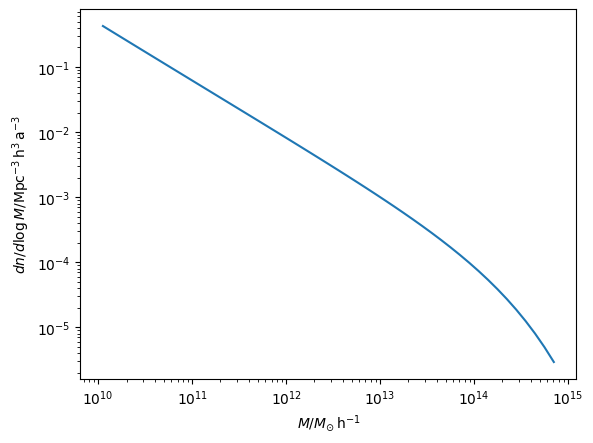

In [69]:
p.plot(m, dn_dlogm)
p.loglog()
p.xlabel(f"$M / {m.units.latex()}$")
p.ylabel(f"$dn / d\\log M / {dn_dlogm.units.latex()}$")

### Obtaining the binned halo mass function from the simulation

In [79]:
bin_center, bin_counts, err = pynbody.analysis.hmf.simulation_halo_mass_function(s,
                       log_M_min=10, log_M_max=15, delta_log_M=0.1, )

(10000000000.0, 1000000000000000.0)

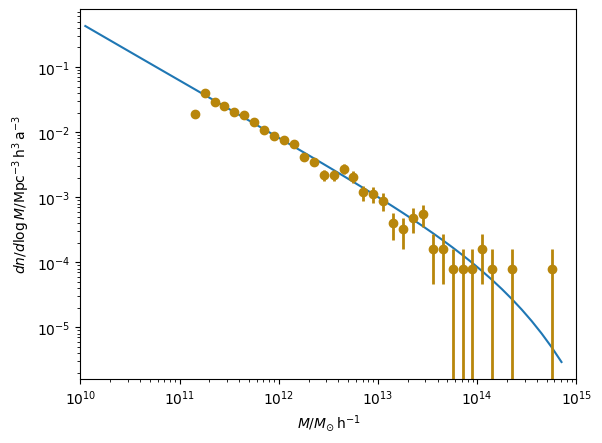

In [80]:
p.plot(m, dn_dlogm)
p.loglog()
p.xlabel(f"$M / {m.units.latex()}$")
p.ylabel(f"$dn / d\\log M / {dn_dlogm.units.latex()}$")

plt.errorbar(bin_center, bin_counts, yerr=err, fmt='o',
             capthick=2, elinewidth=2, color='darkgoldenrod')

plt.xlim(1e10, 1e15)

In [81]:
s.halos()[0].properties.keys()

dict_keys(['omegaM0', 'omegaL0', 'boxsize', 'a', 'h', 'time', 'sigma8', 'halo_number', 'mass', 'pos', 'mmean_200', 'rmean_200', 'mcrit_200', 'rcrit_200', 'mtop_200', 'rtop_200', 'contmass', 'group_len', 'group_off', 'first_sub', 'Nsubs', 'cont_count', 'mostboundID', 'children'])

(10000000000.0, 1000000000000000.0)

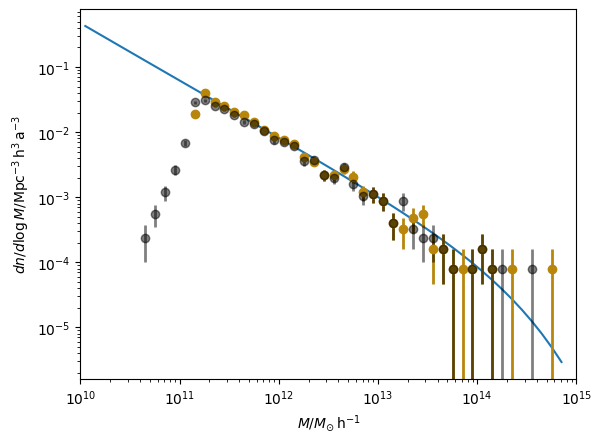

In [82]:


p.plot(m, dn_dlogm)
p.loglog()
p.xlabel(f"$M / {m.units.latex()}$")
p.ylabel(f"$dn / d\\log M / {dn_dlogm.units.latex()}$")

plt.errorbar(bin_center, bin_counts, yerr=err, fmt='o',
             capthick=2, elinewidth=2, color='darkgoldenrod')

bin_center, bin_counts, err = pynbody.analysis.hmf.simulation_halo_mass_function(s,
                       log_M_min=10, log_M_max=15, delta_log_M=0.1,
                       mass_property='mmean_200')

plt.errorbar(bin_center, bin_counts, yerr=err, fmt='o',
             capthick=2, elinewidth=2, color='k', alpha=0.5)

plt.xlim(1e10, 1e15)

## Linking snapshots

In [84]:
!wget 'https://zenodo.org/records/10825178/files/tutorial_gadget4.tar.gz?download=1' -O tutorial_gadget4.tar.gz
!tar -xvzf tutorial_gadget4.tar.gz

--2025-06-17 16:42:13--  https://zenodo.org/records/10825178/files/tutorial_gadget4.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.43.25, 188.185.48.194
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353363838 (337M) [application/octet-stream]
Saving to: ‘tutorial_gadget4.tar.gz’

tutorial_gadget4.ta 100%[===================>] 336.99M  2.88MB/s    in 1m 44s  

2025-06-17 16:43:58 (3.23 MB/s) - ‘tutorial_gadget4.tar.gz’ saved [353363838/353363838]

x tutorial_gadget4/
x tutorial_gadget4/subhalo_desc_035.hdf5
x tutorial_gadget4/subhalo_prog_034.hdf5
x tutorial_gadget4/subhalo_prog_035.hdf5
x tutorial_gadget4/subhalo_desc_034.hdf5
x tutorial_gadget4/subhalo_desc_033.hdf5
x tutorial_gadget4/subhalo_prog_033.hdf5
x tutorial_gadget4/snapshot_035.hdf5
x tutorial_gadget4/fof_subhalo_tab_033.hdf5
x tutorial_gadget4/snapshot_034.hdf5
x tutorial_gadget4/fof_subhalo_tab_034.hdf5
x tutorial

### Basic usage

In [85]:
import pynbody
f1 = pynbody.load("tutorial_gadget4/snapshot_033.hdf5")
f2 = pynbody.load("tutorial_gadget4/snapshot_035.hdf5")

/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/snapshot/gadgethdf.py:449: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [86]:
f"f1 redshift={f1.properties['z']:.2f}; f2 redshift={f2.properties['z']:.2f}"

'f1 redshift=1.35; f2 redshift=1.06'

In [87]:
h2 = f2.halos()

In [88]:
b = f2.bridge(f1)

In [89]:
displacement = np.linalg.norm(f2['pos'] - f1['pos'], axis=1).in_units("Mpc") # <-- wrong thing to do
displacement.mean() # <-- will give wrong answer

/opt/homebrew/anaconda3/envs/grinnell/lib/python3.11/site-packages/pynbody/snapshot/gadgethdf.py:469: UserWarning: Unable to infer units from HDF attributes
  warnings.warn("Unable to infer units from HDF attributes")


SimArray(2.6222444, dtype=float32, 'Mpc')

In [90]:
f2_particles_reordered = b(f1)
displacement = np.linalg.norm(f2_particles_reordered['pos'] - f1['pos'], axis=1).in_units("Mpc")
displacement.mean()

SimArray(0.39596575, dtype=float32, 'Mpc')

### Tracing subregions

In [91]:
progenitor_particles = b(h2[9])

In [92]:
h2[9]['iord']
progenitor_particles['iord']
all(h2[9]['iord'] == progenitor_particles['iord'])

True

In [93]:
progenitor_particles['x']
h2[9]['x']

SimArray([24.320396, 24.320671, 24.32054 , ..., 24.284363, 24.290815,
          24.306082], shape=(6369,), dtype=float32, '3.09e+24 cm a h**-1')

Text(0, 0.5, 'y / code units')

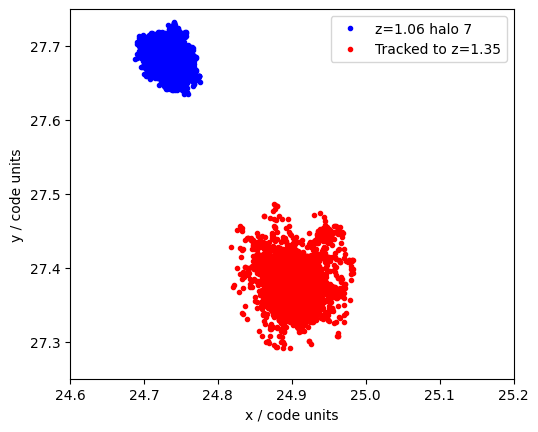

In [94]:
import matplotlib.pyplot as p
p.plot(h2[7]['x'], h2[7]['y'], 'b.', label=f"z={f2.properties['z']:.2f} halo 7")
p.plot(b(h2[7])['x'], b(h2[7])['y'], 'r.', label=f"Tracked to z={f1.properties['z']:.2f}")
p.ylim(27.25, 27.75); p.xlim(24.6, 25.2); p.gca().set_aspect('equal')
p.legend()
p.xlabel('x / code units'); p.ylabel('y / code units')

### Identifying halos between different outputs

In [95]:
h1 = f1.halos()
h1[7]['pos'].mean(axis=0)
b(h2[7])['pos'].mean(axis=0)

SimArray([24.903126, 27.381052, 24.72228 ], dtype=float32, '3.09e+24 cm a h**-1')

In [ ]:
matching = b.match_halos(h2, h1)
matching[7]

np.int64(8)

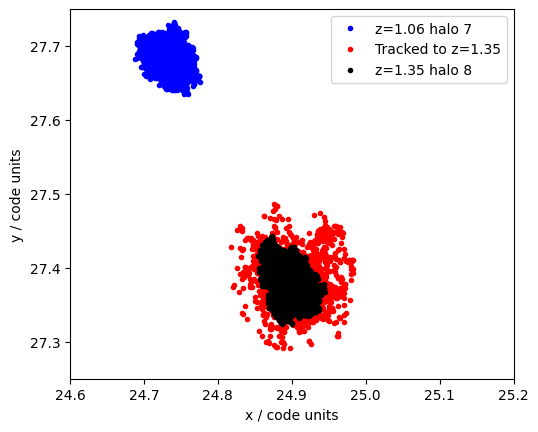

In [100]:
p.plot(h2[7]['x'], h2[7]['y'], 'b.', label=f"z={f2.properties['z']:.2f} halo 7")
p.plot(b(h2[7])['x'], b(h2[7])['y'], 'r.', label=f"Tracked to z={f1.properties['z']:.2f}")
p.ylim(27.25, 27.75); p.xlim(24.6, 25.2); p.gca().set_aspect('equal')
p.legend()
p.xlabel('x / code units'); p.ylabel('y / code units')

p.plot(h1[8]['x'], h1[8]['y'], 'k.', label=f"z={f1.properties['z']:.2f} halo 8")
p.legend()

In [98]:
fuzzy_matching = b.fuzzy_match_halos(h2, h1)
fuzzy_matching[7]

[(np.int64(8), np.float64(0.9741290100034494)),
 (np.int64(770), np.float64(0.018454639530872716))]

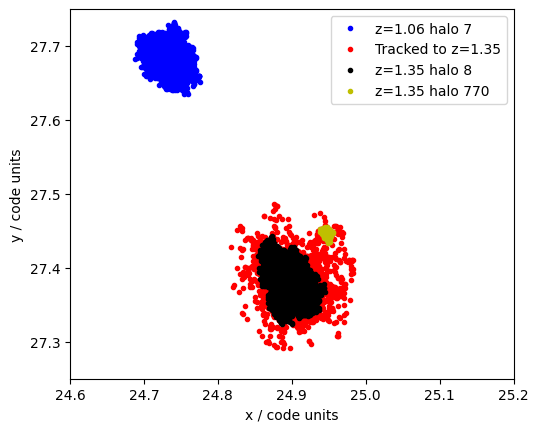

In [102]:
p.plot(h2[7]['x'], h2[7]['y'], 'b.', label=f"z={f2.properties['z']:.2f} halo 7")
p.plot(b(h2[7])['x'], b(h2[7])['y'], 'r.', label=f"Tracked to z={f1.properties['z']:.2f}")
p.ylim(27.25, 27.75); p.xlim(24.6, 25.2); p.gca().set_aspect('equal')
p.legend()
p.xlabel('x / code units'); p.ylabel('y / code units')
p.plot(h1[8]['x'], h1[8]['y'], 'k.', label=f"z={f1.properties['z']:.2f} halo 8")

p.plot(h1[770]['x'], h1[770]['y'], 'y.', label=f"z={f1.properties['z']:.2f} halo 770")
p.legend()